In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Mobile Reviews Sentiment.csv")
df


,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Rebecca Pratt,18,Realme,Realme 12 Pro,526.10,A$804.93,AUD,1.53,4,...,False,3,3,4,3,5,60,12,4,BestBuy
49996,49997,Dr. Tiffany Patterson,28,Samsung,Galaxy Note 20,911.85,A$1395.13,AUD,1.53,3,...,False,3,2,4,1,3,64,11,2,AliExpress
49997,49998,Alexandra Singh,21,Apple,iPhone SE,1155.32,د.إ4240.02,AED,3.67,5,...,True,2,3,4,4,5,64,11,4,Amazon
49998,49999,Robert Morris,31,Realme,Realme Narzo 70,459.04,$459.04,USD,1.00,3,...,True,1,2,2,1,3,56,10,6,AliExpress


Text(0, 0.5, 'Average Rating')

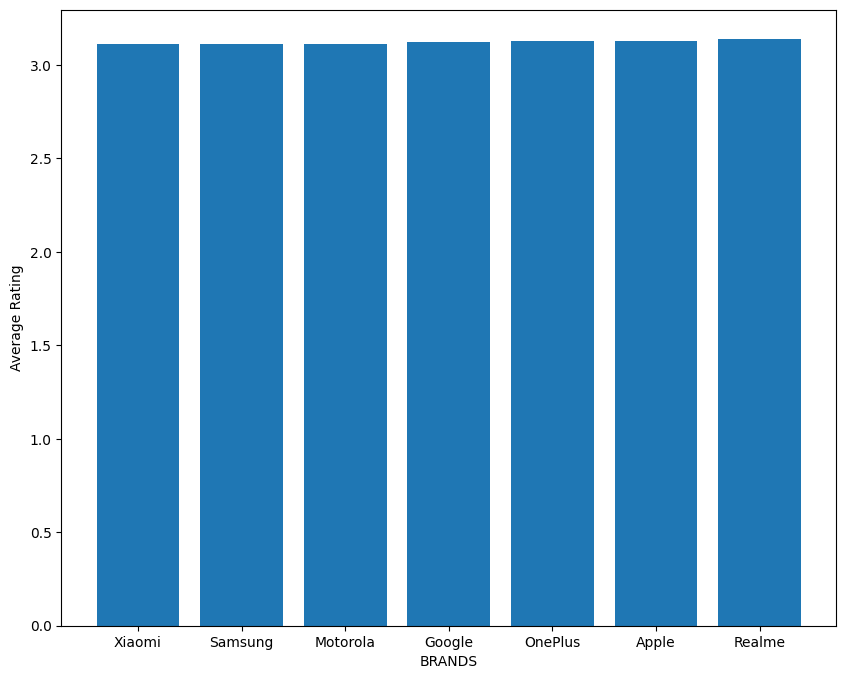

In [2]:

average_rating = df.groupby("brand")["rating"].mean().sort_values()
brands = average_rating.index
values = average_rating.values
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(brands, values)
ax.set_xlabel("BRANDS")
ax.set_ylabel("Average Rating")

Text(0, 0.5, 'Average Price')

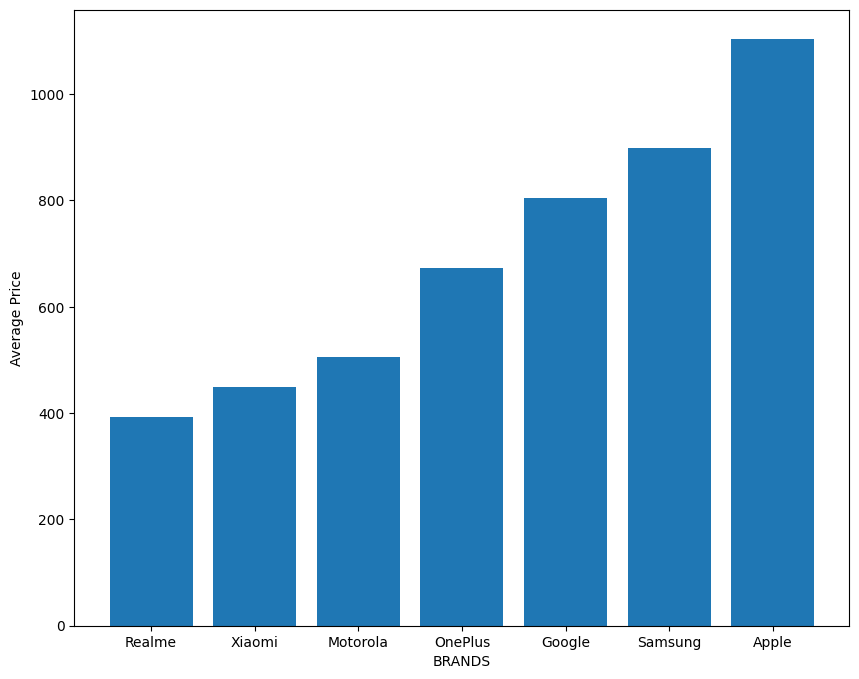

In [3]:
average_price = df.groupby("brand")['price_usd'].mean().sort_values()
prices = average_price.values
brands = average_price.index

fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(brands, prices)
ax.set_xlabel("BRANDS")
ax.set_ylabel("Average Price")

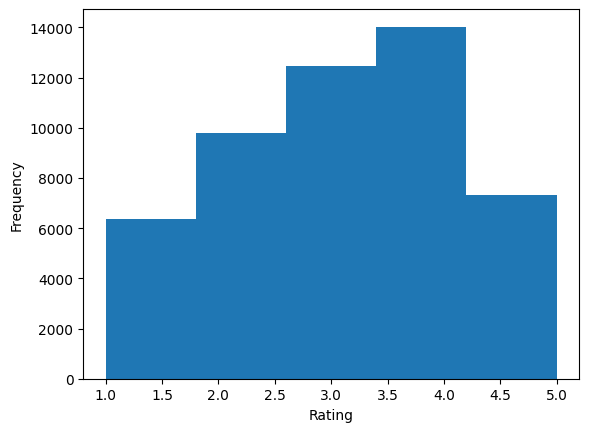

In [4]:
plt.hist(df["rating"], bins = 5)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


C:\Users\Ahmed Jalal\AppData\Local\Temp\ipykernel_23628\197462746.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['negative', 'neutral', 'positive'])


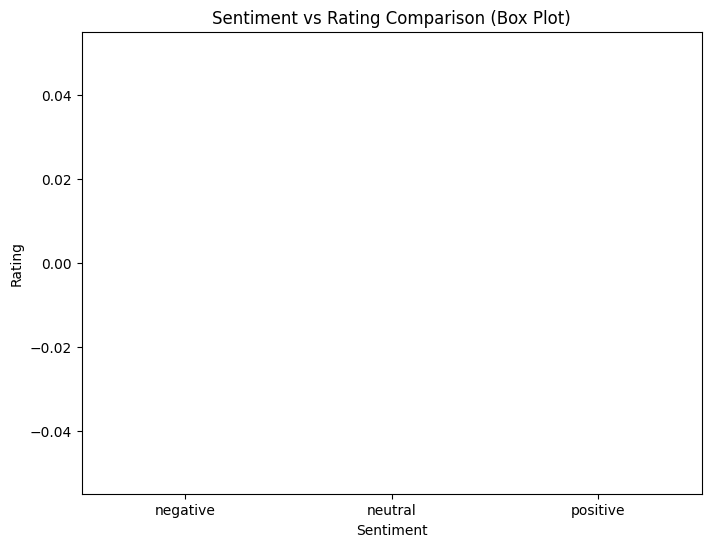

In [5]:
data = [df[df['sentiment'] == s]['rating'] for s in ['negative', 'neutral', 'positive']]

plt.figure(figsize=(8,6))
plt.boxplot(data, labels=['negative', 'neutral', 'positive'])

plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.title("Sentiment vs Rating Comparison (Box Plot)")
plt.show()

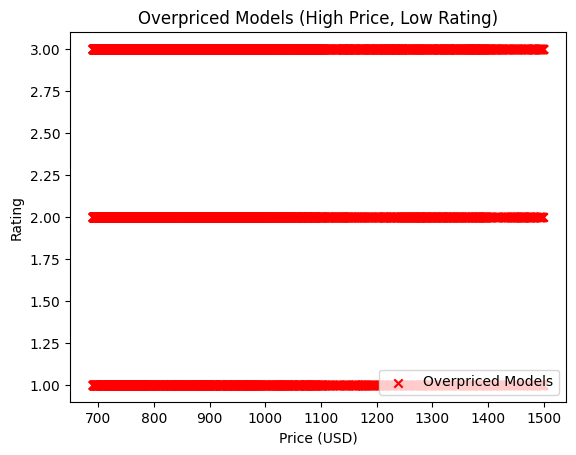

In [6]:
mean_price = df["price_usd"].mean()
mean_rating = df["rating"].mean()

overpriced = df[(df["price_usd"] > mean_price) & (df["rating"] < mean_rating)]
plt.scatter(overpriced["price_usd"], overpriced["rating"], label="Overpriced Models", marker='x', color = 'red',)


plt.xlabel("Price (USD)")
plt.ylabel("Rating")
plt.title("Overpriced Models (High Price, Low Rating)")
plt.legend()

plt.show()

C:\Users\Ahmed Jalal\AppData\Local\Temp\ipykernel_23628\1876999354.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


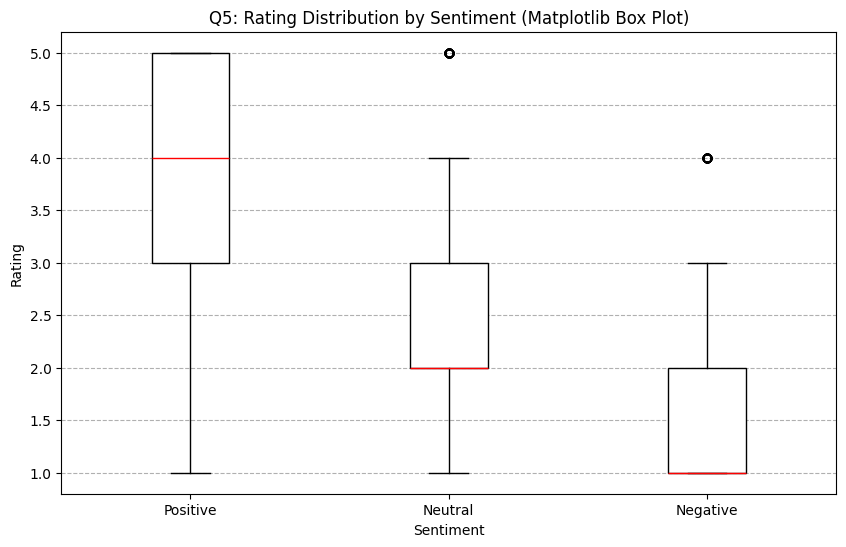

In [ ]:
data_to_plot = [
    df[df['sentiment'] == 'Positive']['rating'].dropna(),
    df[df['sentiment'] == 'Neutral']['rating'].dropna(),
    df[df['sentiment'] == 'Negative']['rating'].dropna()
]
labels = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='white', color='black'),
            medianprops=dict(color='red'))
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--')
plt.show()